# Aim

Get FFAST working at a basic level (no noise, no window_var, etc.).

In [1]:
from ffast import *
from matplotlib import pyplot as plt
import numpy as np
import time

In [2]:
params = make_args()
params.bins = [3, 4, 5]
params.length = 60
params.sparsity = 4
config = Config(params)
config.compute_params()
input_signal = ExperimentInputSignal(config)
input_signal.process()
output_signal = ExperimentOutputSignal(config, input_signal)

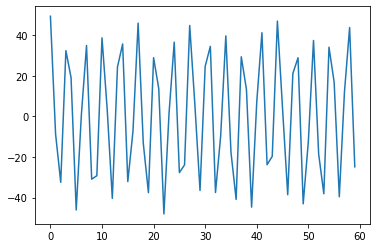

In [3]:
plt.plot(np.real(input_signal.time_signal))

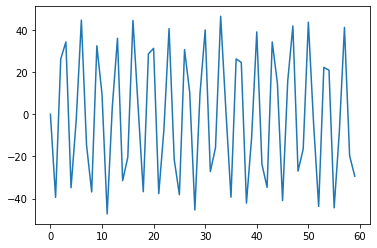

In [4]:
plt.plot(np.imag(input_signal.time_signal))

In [5]:
input_signal.time_signal *= 2 # demonstrating that the input signal can be changed

In [6]:
ffast = FFAST(config, input_signal, output_signal)
if not config.help_displayed:
    time_initial = int(np.round(time.time() * 1000)) # this disregards the time to make the signal
    iterations = config.iterations
    for i in range(iterations):
        input_signal.process() # ffast.get_delays() in the CPP code as an argument
        ffast.process()
        output_signal.process()

    time_final = int(np.round(time.time() * 1000))

    ffast.display_results(time_final - time_initial)

Running experiment mode (for now).
Signal length: 60
Signal sparsity: 4
Noiseless signal
Random phase
Delays: 2
Bins: 3 4 5
<===== NUMBER OF SAMPLES =====>
20 -> used samples
33.33% samples touched
<===== AVERAGE TIME (in milliseconds) =====>
Total time: 16
Time per iteration:  1
